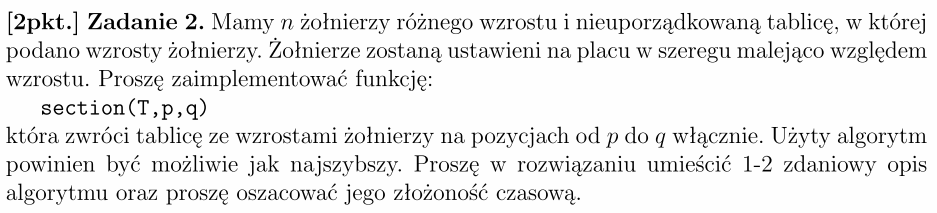

### Omówienie algorytmu

##### Wybranie odpowiednich żołnierzy

W pierwszej kolejności, przy pomocy algorytmu szybkiego wybierania, wybieramy wzrost $ p. $ oraz $ q. $ w kolejności żołnierza. Możemy zauważyć, że po znalezieniu wzrostu żołnieża z pozycji $ p $, przy pomocy algorytmu szybkiego wybierania na bazie Quick Sorta (o złożoności $ O(n) $), mamy pewność, że wszystkie wartości, znajdujące się za indeksem $ p $ są większe od wartości z indeksu $ p $, a wartości na lewo od tego indeksu, są mniejsze od tej wartości (tak działa funkcja partition z algorytmu szybkiego wybierania lub sortowania Quick Sort). Możemy zatem poszukiwać wzrostu żołnierza o $ q. $ w kolejności wzroście, ale tylko na pozostałym przedziale, tj. od indeksu $ p + 1 $ do końca tablicy, czyli indeksu $ n - 1 $. Po wyznaczeniu obu wartości krańcowych, musimy przejść przez tablicę wskaźnikiem od indeksu $ p $ do $ q $ włącznie (lub od $ p - 1 $ do $ q - 1 $ włącznie, jeżeli liczymy od jedynki, czyli np. $ p = 1 $ oznacza pierwszego w kolejności żołnierza, który powinien znaleźć się finalnie pod indeksem $ 0 $ w tablicy) (ja zakładam, że liczymy jak na informatyka przystało 😀, czyli od 0).

##### Posortowanie żołnierzy

Choć w zadaniu nie jest wprost powiedziane, że wzrosty żołnierzy mają zostać posortowane, na kolokwium było wymagane ich posortowanie. Można to wywnioskować z fragmentu: "Żołnierze zostaną ustawieni na placu w szeregu malejąco względem wzrostu.". Ponieważ nie wiemy (i nie możemy zakładać), że wzrosty żołnierzy są zapisane jako liczby naturalne (a jeżeli są zmiennoprzecinkowe, to nie wiemy z jaką dokładnością - tzn. do ilu cyfr po przecinku są one zapisane) oraz nie znamy przedziału, do jakiego należą te liczby (choć to można by założyć), ani ich rozkładu, musimy posortować tablicę wyznaczonych wzrostów żołnierzy algorytmem Quick Sort (lub innym szybkim o złożoności liniowo-logarytmicznej) (żaden algorytm sortujący w czasie liniowym się nie nada). 

### Analiza złożoności

$ O(n) $ - wybieranie $ p. $ oraz $ q. $ w kolejności żołnierza, przepisywanie wzrostów żołnierzy do tablicy wynikowej, którą będziemy później sortować. <br>
$ O((q - p + 1) \cdot log(q - p + 1)) $ - złożoność sortowania tablicy wynikowej. <br>
RAZEM: <br>
$ O(n + (q - p + 1) \cdot log(q - p + 1)) $

### Implementacja algorytmu

In [1]:
def selection(T, p, q):
    # Use quick select to select heights of p. and q. soldiers
    quick_select(T, p)
    quick_select(T, q)
    # Create an array to store heights of soldiers from range p to q
    result = []
    for i in range(p, q + 1):
        result.append(T[i])
    # Sort and return heights of these soldiers
    quick_sort(result)
    return result


def quick_select(arr, k: 'index of a value'):
    if not 0 <= k < len(arr):
        raise IndexError(f'index too {"small" if k < 0 else "large"}')
    if len(arr) == 1:
        return arr[0]
    
    left_idx = 0
    right_idx = len(arr) - 1
    pivot_position = -1
    while k != pivot_position:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position > k:
            right_idx = pivot_position - 1
        else:
            left_idx = pivot_position + 1
            
    return arr[k]


def quick_sort(arr):
    _quick_sort(arr, 0, len(arr) - 1)
    

def _quick_sort(arr, left_idx, right_idx):
    while left_idx < right_idx:
        pivot_position = _partition(arr, left_idx, right_idx)
        
        if pivot_position - left_idx < right_idx - pivot_position:
            _quick_sort(arr, left_idx, pivot_position - 1)
            left_idx = pivot_position + 1  # I removed a tailing recursion
        else:
            _quick_sort(arr, pivot_position + 1, right_idx)
            right_idx = pivot_position  # I removed a tailing recursion
        
        
def _partition(arr, left_idx, right_idx):
    # After running the median of medians function a pivot (this median of medians)
    # will be placed on the left_idx of the subarray
    pivot = arr[left_idx]

    # Partition an array into 2 subarrays: the first one of elements lower than
    # a pivot and the second one of elements greater than or equal to a pivot
    i = left_idx + 1
    for j in range(left_idx, right_idx + 1):
        if arr[j] < pivot:
            _swap(arr, i, j)
            i += 1

    # Place a pivot element on its destination index
    _swap(arr, i - 1, left_idx)

    return i - 1  # Return a pivot position after the last swap

    
def _swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [2]:
import random

arr = [random.random() * 75 + 150 for _ in range(random.randint(1, 100))]
p = random.randrange(len(arr))
q = random.randrange(p, len(arr))

expected_result = sorted(arr)[p:q+1]
result = selection(arr, p, q)

print('Result:')
print(result, end='\n\n')
print('Expected:')
print(expected_result)
print('\nIs correct?', expected_result == result)

Result:
[224.79434847756045]

Expected:
[224.79434847756045]

Is correct? True
